In [79]:
cd E:\2022-2\빅콘테스트\2022빅콘테스트_데이터분석리그_데이터분석분야_퓨처스부문_데이터셋_220908

E:\2022-2\빅콘테스트\2022빅콘테스트_데이터분석리그_데이터분석분야_퓨처스부문_데이터셋_220908


In [110]:
import pandas as pd
import os
import json
import pickle
import json
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [81]:
loan_df=pd.read_csv('./loan_result.csv')
log_df=pd.read_csv('./log_data.csv')
user_df=pd.read_csv('./user_spec.csv')

In [82]:
os.listdir()

['loan_result.csv',
 'log_data.csv',
 'user_spec.csv',
 'mydata',
 'model',
 'json',
 'visual']

In [83]:
loan_df.isnull().sum()

application_id                 0
loanapply_insert_time          0
bank_id                        0
product_id                     0
loan_limit                  7495
loan_rate                   7495
is_applied               3257239
dtype: int64

In [84]:
loan_df = loan_df.loc[loan_df['is_applied'].dropna(axis=0).index]

In [85]:
loan_df['loan_limit']=loan_df['loan_limit'].fillna(loan_df['loan_limit'].mean())

In [86]:
loan_df['loan_rate']=loan_df['loan_rate'].fillna(loan_df['loan_rate'].mean())

In [87]:
data=loan_df

In [88]:
data.drop(['loanapply_insert_time'], axis=1, inplace=True)

In [89]:
data.isna().sum()

application_id    0
bank_id           0
product_id        0
loan_limit        0
loan_rate         0
is_applied        0
dtype: int64

In [90]:
result=dict()

In [91]:
acc_list=[]
f1_list=[]
confusion_list=[]

for i in range(100):
    data_set=data.sample(100_000)
    x, y = data_set.loc[:,data_set.columns!='is_applied'], data_set['is_applied']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    model = RandomForestClassifier(random_state=42)
    model.fit(x_train, y_train)
    y_pred=model.predict(x_test)
    acc=model.score(x_test,y_test)
    f1=f1_score(y_test,y_pred)
    con=confusion_matrix(y_test,y_pred)
    acc_list.append(acc)
    f1_list.append(f1)
    confusion_list.append(con)
    with open(f'./mydata/data_set_fillAvg_{i}.txt','w') as f:
        f.write('\n'.join(map(str,data_set.index)))
    saved_model = pickle.dumps(model)
    joblib.dump(model,f'./model/data_set_fillAvg_{i}.pkl')
    print(i,'done')

0 done
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
51 done
52 done
53 done
54 done
55 done
56 done
57 done
58 done
59 done
60 done
61 done
62 done
63 done
64 done
65 done
66 done
67 done
68 done
69 done
70 done
71 done
72 done
73 done
74 done
75 done
76 done
77 done
78 done
79 done
80 done
81 done
82 done
83 done
84 done
85 done
86 done
87 done
88 done
89 done
90 done
91 done
92 done
93 done
94 done
95 done
96 done
97 done
98 done
99 done


In [92]:
result=dict()
result['acc']=acc_list
result['f1']=f1_list

C:\Users\dbelr\AppData\Local\Temp\ipykernel_11452\2039851660.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax=plt.subplots(figsize=(2,2))


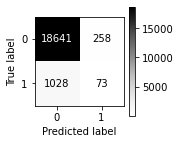

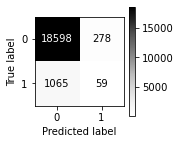

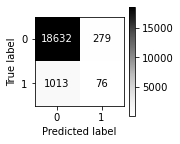

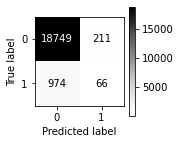

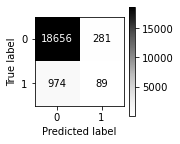

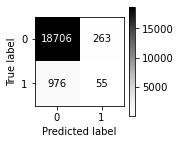

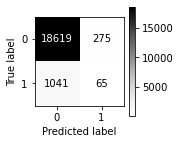

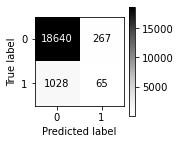

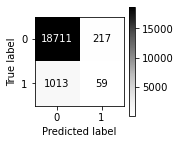

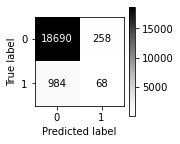

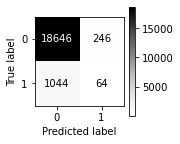

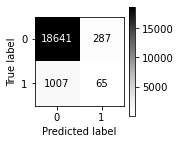

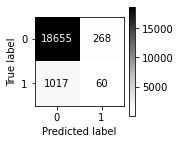

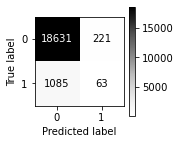

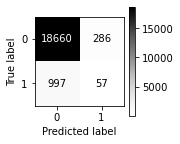

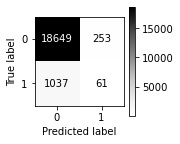

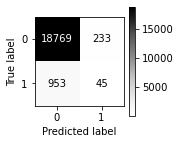

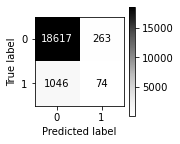

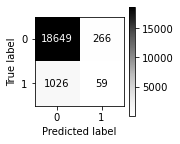

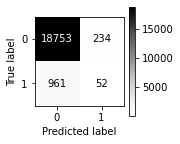

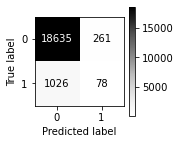

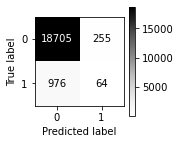

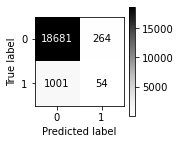

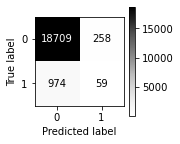

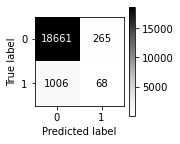

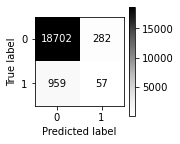

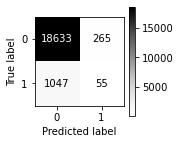

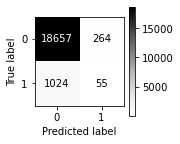

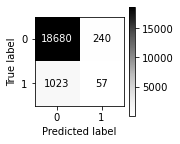

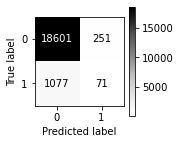

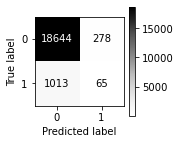

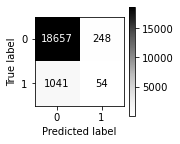

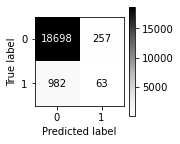

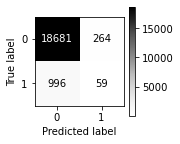

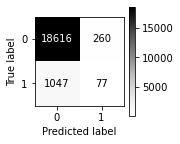

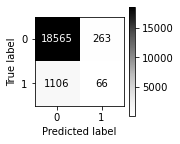

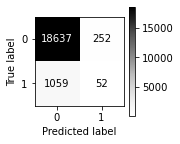

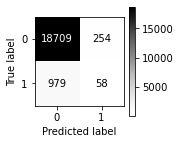

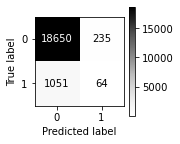

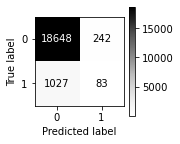

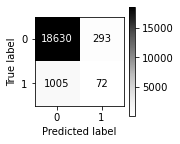

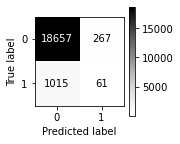

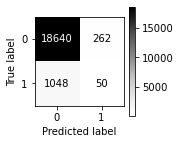

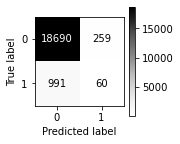

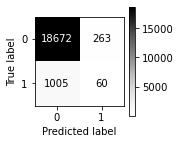

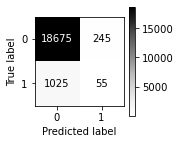

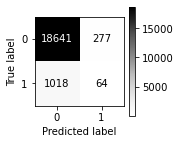

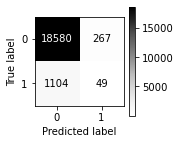

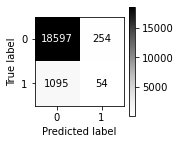

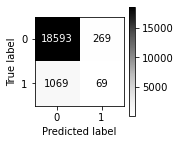

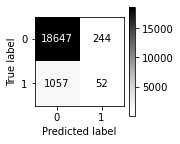

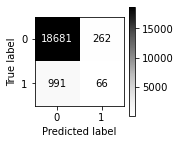

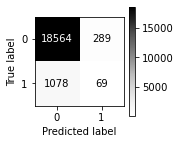

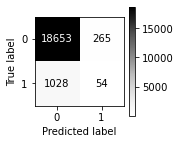

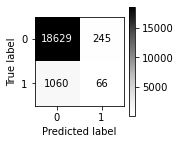

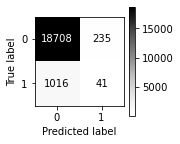

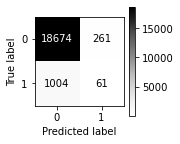

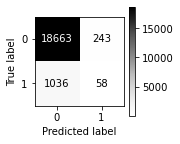

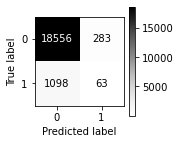

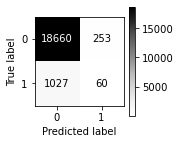

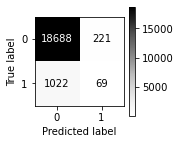

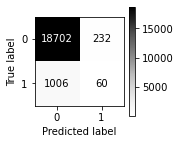

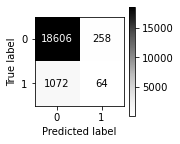

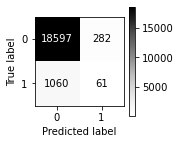

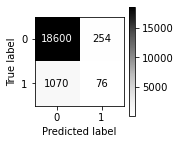

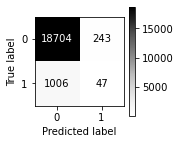

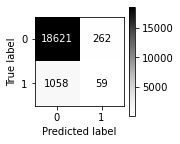

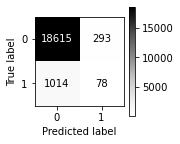

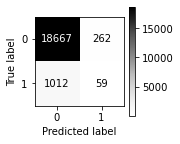

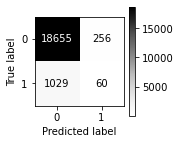

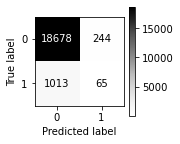

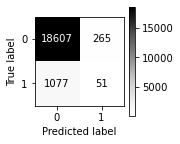

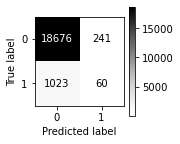

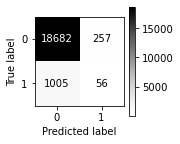

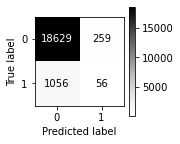

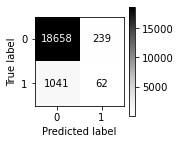

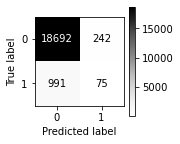

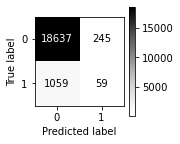

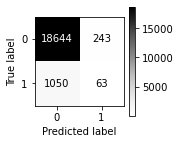

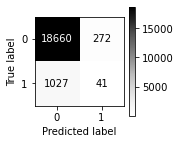

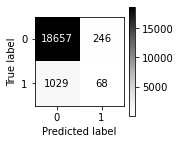

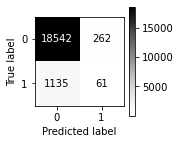

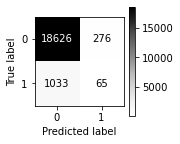

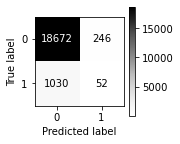

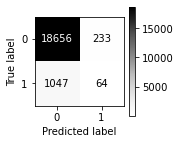

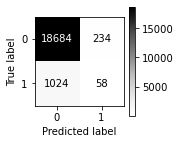

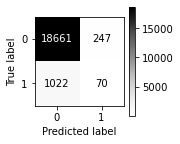

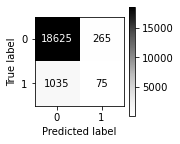

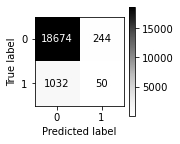

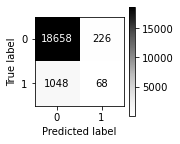

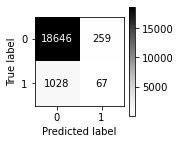

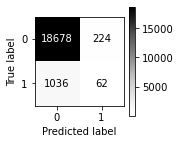

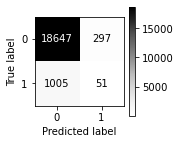

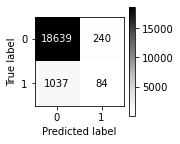

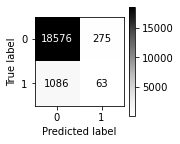

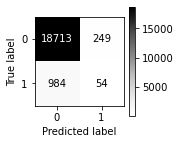

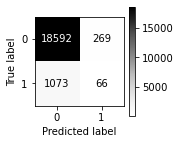

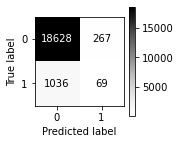

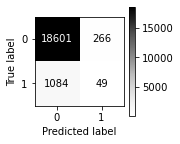

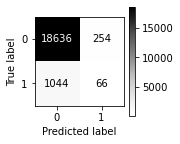

In [93]:
for i, cm in enumerate(confusion_list):
    d=ConfusionMatrixDisplay(cm,display_labels=[0,1])
    fig,ax=plt.subplots(figsize=(2,2))
    d.plot(cmap='Greys',ax=ax)
    plt.savefig(f'./visual/model{i}cm_fillAvg_.png')

In [94]:
with open('./json/result1_fillAvg_.json','w') as f:
    json.dump(result,f)

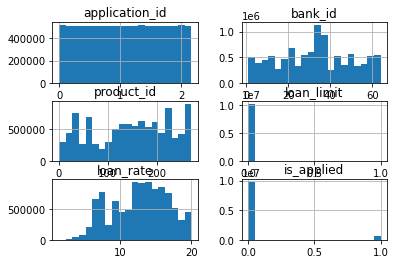

In [107]:
data.hist(bins=20)
plt.show()

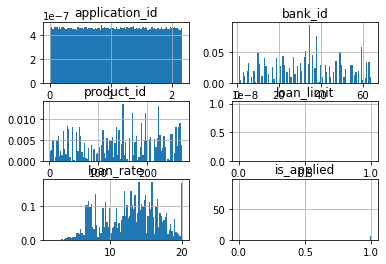

In [104]:
data.hist(bins=100,density=True)
plt.show()

<AxesSubplot:xlabel='loan_limit', ylabel='loan_rate'>

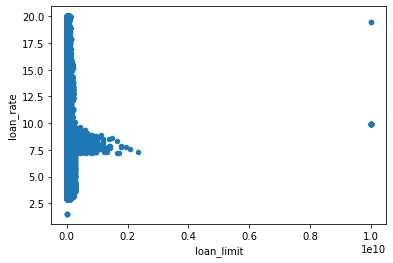

In [99]:
data.plot(kind="scatter",x="loan_limit",y="loan_rate")

<AxesSubplot:xlabel='loan_limit', ylabel='is_applied'>

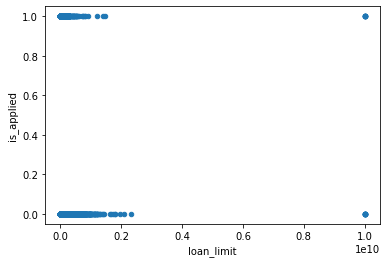

In [102]:
data.plot(kind="scatter",x="loan_limit",y="is_applied")

In [121]:
data

,application_id,bank_id,product_id,loan_limit,loan_rate,is_applied
13284,2157865,54,235,20000000.0,16.5,1.0
13285,576643,54,235,11000000.0,16.5,0.0
13286,576643,11,118,3000000.0,20.0,0.0
13287,2136706,42,216,10000000.0,13.5,0.0
13288,2136706,25,169,22000000.0,15.9,0.0
...,...,...,...,...,...,...
13519634,1969227,2,7,30000000.0,13.6,0.0
13519635,1969227,33,110,9000000.0,14.4,0.0
13519636,1969227,50,142,3000000.0,11.2,0.0
13519637,1969227,22,100,4000000.0,15.3,0.0


In [123]:
attributes=['loan_limit','loan_rate']
scatter_matrix(data[attributes],figsize=(12.8))

TypeError: Value after * must be an iterable, not float

In [ ]:
attributes=['loan_limit','loan_rate']
scatter_matrix(data[attributes],figsize=(12.8))